In [35]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from jre_utils.config import asset_types

from jre_utils.datapath import (
    model_built_data_paths,
    model_ready_data_paths,
    get_derived_csv_path,
    get_derived_lpa_path,
    get_derived_plps_path,
)

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [36]:
asset_type = "land"
years_ahead = 2

metrics = {
    "weighted_mean": "unit_price_wmean",
    "weighted_median": "unit_price_wmedian",
    "mean": "unit_price_mean",
    "median": "unit_price_median",
    "weighted_mean_smoothed": "unit_price_wmean_smoothed",
    "weighted_median_smoothed": "unit_price_wmedian_smoothed",
    "mean_smoothed": "unit_price_mean_smoothed",
    "median_smoothed": "unit_price_median_smoothed",
}

dataset_paths = {
    "transactions": get_derived_csv_path(asset_type),
    "lpa": get_derived_lpa_path(),
    "plps": get_derived_plps_path()
}

granularity_columns = ["area", "area_code"]
group_by_columns = granularity_columns + ["year"]
display_columns = ["unit_price", "total_traded_area", "count"]

# metric_key_unsmoothed = "weighted_median"
metric_key_unsmoothed = "median"
metric_unsmoothed = metrics[metric_key_unsmoothed]

# metric_key = f"{metric_key_unsmoothed}_smoothed"
metric_key = "median"
metric = metrics[metric_key]

metric_pct_chg = metric + "_pct_chg"
upcoming_metric = "upcoming_" + metric

In [37]:
start_year = 2006
eval_start_year = 2020 # eval_years = [2020, 2021, 2022]
eval_end_year = 2022

dataset_key = "transactions"
years_ahead = 2

dataset_name = f"sequence_{dataset_key}_{asset_type}_{metric_key}_{years_ahead}"
output_dataset_name = f"{dataset_name}_{eval_start_year}"
model_built_data_path = model_built_data_paths[dataset_name]
model_ready_data_path = model_ready_data_paths[dataset_name]

df = pd.read_csv(model_built_data_path)
df = df.assign(asset_type=asset_type)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sort_values(by=["year"]).reset_index(drop=True)


In [38]:
df

,area_code,area,year,asset_type,unit_price_median_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available
0,21210,Gifu-ken Ena-shi,2005,land,NaN,NaN,NaN,0.028802,-0.001349,-0.017106,-0.004933,0.015684,0.016031,10500.0,46.0,19870.0,1396.0,1649.0,51285.0,22626.0,67810199.0,2997.003403,6506783.0,288.0,18363.0,-1.455349,-0.465752,0.004243,0.181530,0.203429,0.410522,0.575509,0.543550,-0.051634,0.581324,-0.493296,-0.673474,NaN,NaN,NaN,0.024642,-0.052429,0.128356,0.049858,-0.457257,-0.207145,1,1,1,1,0
1,21214,Gifu-ken Kani-shi,2005,land,NaN,NaN,NaN,0.033118,0.019134,-0.020847,-0.000502,0.026927,0.040833,40000.0,90.0,30125.0,3403.0,3454.0,101688.0,43945.0,147122648.0,3347.881397,13601233.0,913.0,33907.0,-0.640712,0.144944,0.368491,0.737876,0.688668,0.862421,1.012863,1.029542,0.709495,1.046883,0.293337,-0.001233,NaN,NaN,NaN,0.054219,0.434247,-0.007874,0.489433,0.386507,0.686272,1,1,1,1,0
2,13101,Tokyo-to Chiyoda-ku,2005,land,NaN,NaN,NaN,0.111877,0.175917,0.114788,0.019842,0.084664,0.054835,1600000.0,13.0,3425.0,5588.0,4622.0,48684.0,23411.0,189798304.0,8107.227543,14519864.0,2099.0,24792.0,1.606184,-1.585162,-1.534469,1.047618,0.879876,0.376162,0.597979,1.189350,6.790369,1.088151,0.861661,-0.344435,NaN,NaN,NaN,0.593920,4.159389,4.930761,2.507318,4.719660,1.190658,1,1,1,1,0
3,13110,Tokyo-to Meguro-ku,2005,land,NaN,NaN,NaN,0.031731,0.042182,0.020321,0.004173,0.028873,0.021426,700000.0,73.0,15190.0,22009.0,20880.0,270523.0,130670.0,718304701.0,5497.089623,37677965.0,3547.0,122849.0,1.102651,-0.046196,-0.230834,1.903851,1.869855,1.508374,1.730822,2.024440,4.118860,1.690251,1.219960,1.409891,NaN,NaN,NaN,0.044717,0.981865,1.491108,0.953136,0.532571,-0.012813,1,1,1,1,0
4,13102,Tokyo-to Chuo-ku,2005,land,NaN,NaN,NaN,0.125586,0.162538,0.059329,0.043452,0.049755,0.097429,885000.0,28.0,5090.0,14138.0,9163.0,114494.0,51352.0,293755435.0,5720.428318,17357907.0,3153.0,63370.0,1.245491,-0.912052,-1.187768,1.627397,1.329129,0.940727,1.115486,1.463410,4.392681,1.200880,1.139540,0.684267,NaN,NaN,NaN,0.687861,3.841522,2.911440,4.849157,2.099782,2.725024,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20290,12100,Chiba-ken Chiba-shi,2022,land,0.075269,-0.128250,0.020408,0.027824,NaN,NaN,0.003178,NaN,NaN,100000.0,503.0,153990.0,46413.0,43287.0,983500.0,NaN,NaN,NaN,205437959.0,NaN,NaN,1.140488,2.425753,2.145639,2.396986,2.426104,2.300572,NaN,NaN,NaN,1.425865,NaN,NaN,-0.124041,-0.208608,-0.186036,-0.115695,NaN,NaN,0.595931,NaN,NaN,1,0,0,1,1
20291,2381,Aomori-ken Itayanagi-machi,2022,land,-0.390909,-0.250000,0.511278,-0.016976,NaN,NaN,-0.005574,NaN,NaN,10050.0,6.0,3020.0,202.0,272.0

In [39]:
log_normalize_columns = [
    metric,
    "count",
    "total_traded_area",
    "in_migrations",
    "out_migrations",
    "population",
    "taxpayer_count",
    "taxable_income",
    "taxable_income_per_taxpayer",
    "total_tax",
    "new_dwellings",
    "existing_dwellings",
]

normalize_columns = [
    metric_pct_chg,
    "count_growth",
    "yearly_price_growth",
    "total_tax_growth",
    "taxable_income_growth",
    "taxable_income_per_taxpayer_growth",
    "net_migration_ratio",
    "new_dwellings_ratio",
    "taxpayer_count_growth",
]

maintain_columns = [
    "migrations_is_available",
    "taxable_income_is_available",
    "dwellings_is_available",
    "total_tax_is_available",
    "metric_pct_chg_is_available"
]

id_columns = ["area_code", "area", "year", "asset_type"]

feature_columns = (
    [f"{column}_log_normalized_yearly" for column in log_normalize_columns]
    + [f"{column}_normalized_yearly" for column in normalize_columns]
    + maintain_columns
)

final_columns = id_columns + normalize_columns + log_normalize_columns + feature_columns

# add ratios and growths if necessary

df = df[final_columns]

In [40]:
# for column in log_normalize_columns:
#     df[f"{column}_log"] = df[column].apply(lambda x: np.log10(1 + x))
#     df[f"{column}_log_normalized_yearly"] = df.groupby("year")[f"{column}_log"].transform(
#         lambda x: (x - x.mean()) / x.std()
#     )

# for column in normalize_columns:
#     df[f"{column}_normalized_yearly"] = df.groupby("year")[column].transform(
#         lambda x: (x - x.mean()) / x.std()
#     )

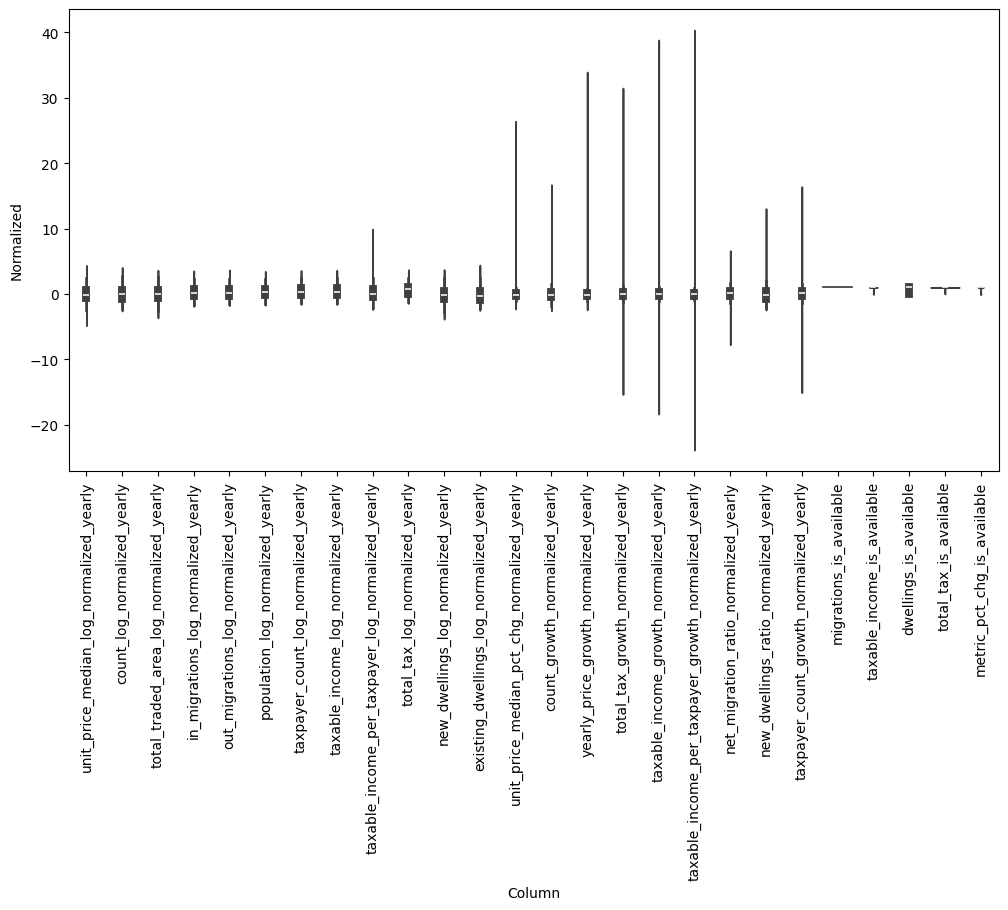

In [41]:
df_std = df[feature_columns].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df[feature_columns].keys(), rotation=90)

In [42]:
df = df[final_columns]
df[final_columns].describe()

,area_code,year,unit_price_median_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available
count,20295.000000,20295.000000,17737.000000,19016.000000,19016.000000,20205.000000,19105.000000,19105.000000,20295.000000,12029.000000,19105.000000,2.029500e+04,20295.000000,20295.000000,20295.000000,20295.000000,2.029500e+04,1.910500e+04,1.910500e+04,19105.000000,2.022600e+04,12029.000000,1.202900e+04,2.029500e+04,2.029500e+04,2.029500e+04,20295.000000,20295.000000,20295.000000,19105.000000,19105.000000,19105.000000,20226.000000,12029.000000,12029.000000,1.773700e+04,1.901600e+04,1.901600e+04,20205.000000,19105.000000,19105.000000,20295.000000,12029.000000,19105.000000,20295.0,20295.000000,20295.000000,20295.00000,20295.000000
mean,21810.306036,2014.483075,0.072245,0.080341,0.079387,0.007299,0.003431,0.001448,-0.002821,0.013669,0.001872,5.310991e+04,81.317664,31430.114807,4052.557477,4075.916591,1.001721e+05,4.487178e+04,1.510912e+08,2938.447420,1.538683e+07,1113.780281,6.864267e+04,-2.338717e-16,-3.133460e-16,1.118593e-16,0.285565,0.287425,0.328492,0.439969,0.435636,0.200435,0.567898,-0.102033,-0.098002,4.807190e-18,1.868276e-19,1.728155e-17,0.058629,0.038248,-0.012715,0.115247,-0.077256,0.100833,1.0,0.941365,0.592708,0.99660,0.873959
std,13475.587026,4.601001,0.734218,0.480476,0.898030,0.053318,0.049414,0.040574,0.006282,0.007082,0.023563,1.245998e+05,135.938139,45165.256404,11972.539899,11521.625932,2.240979e+05,1.017244e+05,3.842724e+08,580.254029,4.366260e+07,2558.929759,1.339862e+05,9.995811e-01,9.995811e-01,9.995811e-01,0.768550,0.768753,0.741401,0.754313,0.771642,1.011083,0.713669,1.016128,1.039491,9.995770e-01,9.995792e-01,9.995792e-01,1.063753,0.859694,0.872235,0.699921,0.955867,0.791034,0.0,0.234946,0.491342,0.05821,0.331904
min,1100.000000,2005.000000,-0.978529,-0.903226,-0.994707,-0.677251,-0.682739,-0.694693,-0.102674,0.000557,-0.590998,1.085000e+02,3.000000,365.000000,59.000000,83.000000,2.729000e+03,1.164000e+03,2.693730e+06,1989.133483,3.919550e+05,5.000000,4.966000e+03,-4.574096e+00,-2.327901e+00,-3.376620e+00,-1.690953,-1.581958,-1.515944,-1.386153,-1.392187,-2.098896,-1.251862,-3.553202,-2.205262,-2.018725e+00,-2.305423e+00,-2.157031e+00,-15.073015,-18.121708,-23.624752,-7.575169,-2.178107,-14.862366,1.0,0.000000,0.000000,0.00000,0.000000
25%,11219.000000,2011.000000,-0.184615,-0.181818,-0.153846,-0.014090,-0.010434,-0.008953,-0.006389,0.009025,-0.007033,1.200000e+04,19.000000,8295.000000,553.000000,664.000000,1.882450e+04,8.032000e+03,2.193250e+07,2603.444028,2.400727e+06,179.000000,1.813500e+04,-6.486109e-01,-7.246487e-01,-6.664908e-01,-0.289956,-0.268532,-0.230886,-0.130829,-0.143638,-0.482950,0.030483,-0.815951,-0.852958,-3.766655e-01,-5.395105e-01,-3.539963e-01,-0.298758,-0.249755,-0.251508,-0.288573,-

In [43]:
# df = df.fillna(0) # Fill NA right before the model run
df.to_csv(model_ready_data_path, index=False)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20295 entries, 0 to 20294
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   area_code                                             20295 non-null  int64  
 1   area                                                  20295 non-null  object 
 2   year                                                  20295 non-null  int64  
 3   asset_type                                            20295 non-null  object 
 4   unit_price_median_pct_chg                             17737 non-null  float64
 5   count_growth                                          19016 non-null  float64
 6   yearly_price_growth                                   19016 non-null  float64
 7   total_tax_growth                                      20205 non-null  float64
 8   taxable_income_growth                                 19

In [45]:
# Combine Dataframes for model training

combined_df = pd.DataFrame()
for asset_type in asset_types.keys():
    dataset_name = f"sequence_{dataset_key}_{asset_type}_{metric_key}_{years_ahead}"
    df = pd.read_csv(model_ready_data_paths[dataset_name])
    combined_df = pd.concat([combined_df, df], ignore_index=True)
    

In [46]:
asset_type_dummies = pd.get_dummies(combined_df["asset_type"], drop_first=True, dtype=float)
combined_df = pd.concat([combined_df, asset_type_dummies], axis=1)

In [47]:
combined_df

,area_code,area,year,asset_type,unit_price_median_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available,condo,land
0,21210,Gifu-ken Ena-shi,2005,land,NaN,NaN,NaN,0.028802,-0.001349,-0.017106,-0.004933,0.015684,0.016031,1.050000e+04,46.0,19870.0,1396.0,1649.0,51285.0,22626.0,67810199.0,2997.003403,6506783.0,288.0,18363.0,-1.455349,-0.465752,0.004243,0.181530,0.203429,0.410522,0.575509,0.543550,-0.051634,0.581324,-0.493296,-0.673474,NaN,NaN,NaN,0.024642,-0.052429,0.128356,0.049858,-0.457257,-0.207145,1,1,1,1,0,0.0,1.0
1,21214,Gifu-ken Kani-shi,2005,land,NaN,NaN,NaN,0.033118,0.019134,-0.020847,-0.000502,0.026927,0.040833,4.000000e+04,90.0,30125.0,3403.0,3454.0,101688.0,43945.0,147122648.0,3347.881397,13601233.0,913.0,33907.0,-0.640712,0.144944,0.368491,0.737876,0.688668,0.862421,1.012863,1.029542,0.709495,1.046883,0.293337,-0.001233,NaN,NaN,NaN,0.054219,0.434247,-0.007874,0.489433,0.386507,0.686272,1,1,1,1,0,0.0,1.0
2,13101,Tokyo-to Chiyoda-ku,2005,land,NaN,NaN,NaN,0.111877,0.175917,0.114788,0.019842,0.084664,0.054835,1.600000e+06,13.0,3425.0,5588.0,4622.0,48684.0,23411.0,189798304.0,8107.227543,14519864.0,2099.0,24792.0,1.606184,-1.585162,-1.534469,1.047618,0.879876,0.376162,0.597979,1.189350,6.790369,1.088151,0.861661,-0.344435,NaN,NaN,NaN,0.593920,4.159389,4.930761,2.507318,4.719660,1.190658,1,1,1,1,0,0.0,1.0
3,13110,Tokyo-to Meguro-ku,2005,land,NaN,NaN,NaN,0.031731,0.042182,0.020321,0.004173,0.028873,0.021426,7.000000e+05,73.0,15190.0,22009.0,20880.0,270523.0,130670.0,718304701.0,5497.089623,37677965.0,3547.0,122849.0,1.102651,-0.046196,-0.230834,1.903851,1.869855,1.508374,1.730822,2.024440,4.118860,1.690251,1.219960,1.409891,NaN,NaN,NaN,0.044717,0.981865,1.491108,0.953136,0.532571,-0.012813,1,1,1,1,0,0.0,1.0
4,13102,Tokyo-to Chuo-ku,2005,land,NaN,NaN,NaN,0.125586,0.162538,0.059329,0.043452,0.049755,0.097429,8.850000e+05,28.0,5090.0,14138.0,9163.0,114494.0,51352.0,293755435.0,5720.428318,17357907.0,3153.0,63370.0,1.245491,-0.912052,-1.187768,1.627397,1.329129,0.940727,1.115486,1.463410,4.392681,1.200880,1.139540,0.684267,NaN,NaN,NaN,0.687861,3.841522,2.911440,4.849157,2.099782,2.725024,1,1,1,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43476,23224,Aichi-ken Chita-shi,2022,condo,0.144886,0.600000,-0.020486,0.029530,NaN,NaN,-0.003195,NaN,NaN,1.679167e+05,8.0,600.0,2407.0,2675.0,83873.0,NaN,NaN,NaN,15577678.0,NaN,NaN,-0.830137,-1.425777,-1.430650,0.652179,0.685833,0.734317,NaN,NaN,NaN,1.082495,NaN,NaN,0.114995,1.799768,-0.387368,-0.093199,NaN,NaN,-0.003656,NaN,NaN,1,0,0,1,1,1.0,0.0
43477,24204,Mie-ken Matsusaka-shi,2022,condo,0.073183,-0

In [48]:
dataset_name = f"sequence_{dataset_key}_{"all"}_{metric_key}_{years_ahead}"
combined_df.to_csv(model_ready_data_paths[dataset_name], index=False)

In [49]:
asset_type_dummies 

,condo,land
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
43476,1.0,0.0
43477,1.0,0.0
43478,1.0,0.0
43479,1.0,0.0
